In [1]:
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, asin, sqrt

In [3]:
df = pd.read_csv(r"C:\Users\BLUEZONE\Desktop\Amazone Delivery\amazon_delivery.csv")

In [4]:
print(" First 5 rows of dataset:")
print(df.head())

print("\n Dataset info:")
print(df.info())

print("\n Missing values in each column:")
print(df.isnull().sum())

 First 5 rows of dataset:
        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       

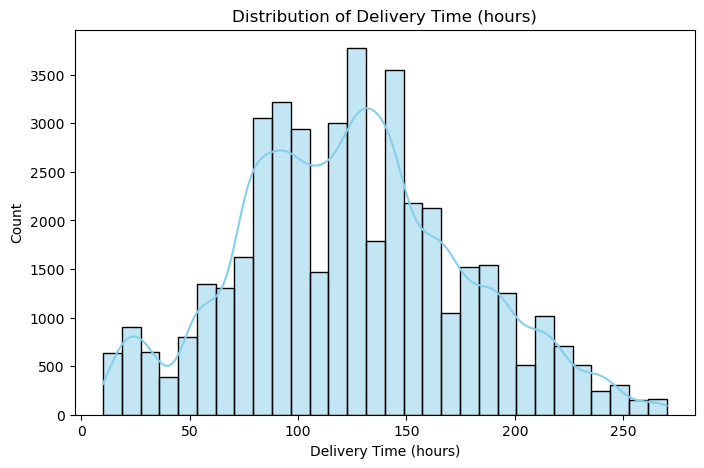

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Delivery Time (hours)")
plt.xlabel("Delivery Time (hours)")
plt.ylabel("Count")
plt.show()

In [6]:
print("Total duplicates:", df.duplicated().sum())

df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

print("\nMissing values before handling:")
print(df.isnull().sum())

num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())

Total duplicates: 0
After removing duplicates: (43739, 16)

Missing values before handling:
Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

Missing values after handling:
Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [7]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    km = 6371 * c
    return km

df['distance_km'] = df.apply(lambda row: haversine(
    row['Store_Longitude'], row['Store_Latitude'],
    row['Drop_Longitude'], row['Drop_Latitude']), axis=1)

print("Distance calculated. Sample values:")
print(df[['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','distance_km']].head())

Distance calculated. Sample values:
   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  distance_km
0       22.745049        75.892471      22.765049       75.912471     3.025149
1       12.913041        77.683237      13.043041       77.813237    20.183530
2       12.914264        77.678400      12.924264       77.688400     1.552758
3       11.003669        76.976494      11.053669       77.026494     7.790401
4       12.972793        80.249982      13.012793       80.289982     6.210138


In [8]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    km = 6371 * c
    return km

df['distance_km'] = df.apply(lambda row: haversine(
    row['Store_Longitude'], row['Store_Latitude'],
    row['Drop_Longitude'], row['Drop_Latitude']), axis=1)

print("Distance calculated. Sample values:")
print(df[['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','distance_km']].head())

def extract_hour(t):
    try:
        return int(str(t).split(":")[0])
    except:
        return np.nan

df['order_hour'] = df['Order_Time'].apply(extract_hour)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['order_weekday'] = df['Order_Date'].dt.weekday
df['is_weekend'] = df['order_weekday'].isin([5,6]).astype(int)

print("Time features created:")
print(df[['Order_Time','order_hour','Order_Date','order_weekday','is_weekend']].head())

def time_to_minutes(t):
    try:
        parts = str(t).split(":")
        return int(parts[0])*60 + int(parts[1])
    except:
        return np.nan

df['order_time_mins'] = df['Order_Time'].apply(time_to_minutes)
df['pickup_time_mins'] = df['Pickup_Time'].apply(time_to_minutes)
df['pickup_delay_mins'] = df['pickup_time_mins'] - df['order_time_mins']

print("Pickup delay calculated:")
print(df[['Order_Time','Pickup_Time','pickup_delay_mins']].head())

Distance calculated. Sample values:
   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  distance_km
0       22.745049        75.892471      22.765049       75.912471     3.025149
1       12.913041        77.683237      13.043041       77.813237    20.183530
2       12.914264        77.678400      12.924264       77.688400     1.552758
3       11.003669        76.976494      11.053669       77.026494     7.790401
4       12.972793        80.249982      13.012793       80.289982     6.210138
Time features created:
  Order_Time  order_hour Order_Date  order_weekday  is_weekend
0   11:30:00        11.0 2022-03-19              5           1
1   19:45:00        19.0 2022-03-25              4           0
2   08:30:00         8.0 2022-03-19              5           1
3   18:00:00        18.0 2022-04-05              1           0
4   13:30:00        13.0 2022-03-26              5           1
Pickup delay calculated:
  Order_Time Pickup_Time  pickup_delay_mins
0   11:30:00    11:4

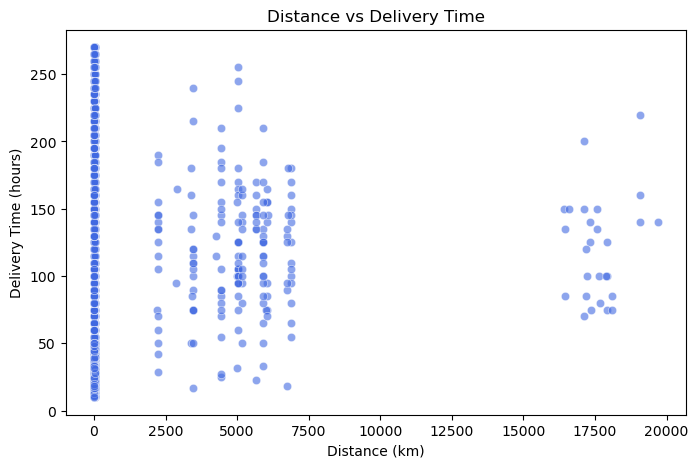

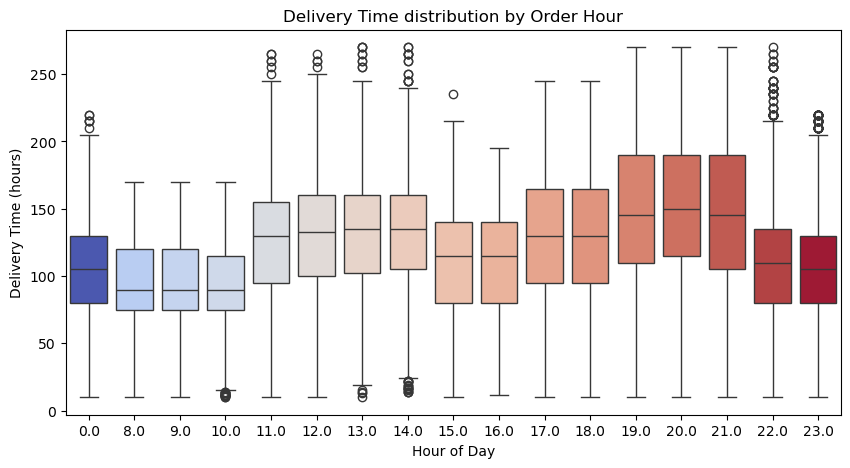

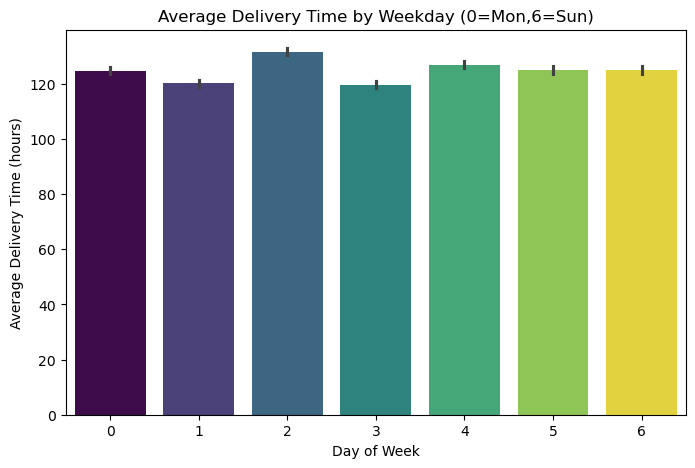

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='distance_km', y='Delivery_Time', data=df, alpha=0.6, color="royalblue")
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (hours)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='order_hour', y='Delivery_Time', data=df, hue='order_hour', palette="coolwarm", legend=False)
plt.title("Delivery Time distribution by Order Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Delivery Time (hours)")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='order_weekday', y='Delivery_Time', data=df, estimator=np.mean, hue='order_weekday', palette="viridis", legend=False)
plt.title("Average Delivery Time by Weekday (0=Mon,6=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Average Delivery Time (hours)")
plt.show()

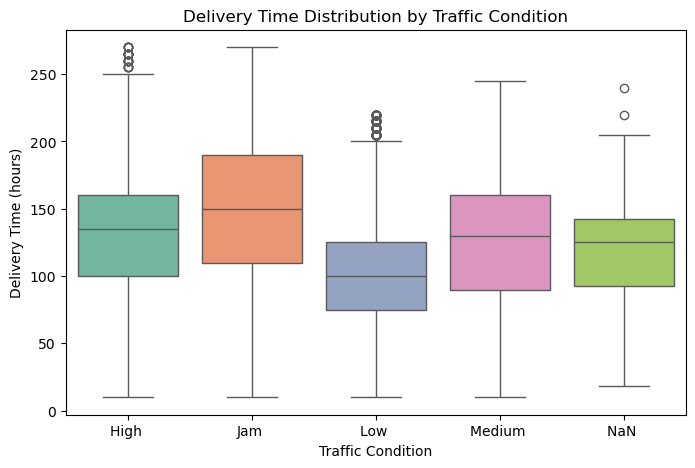

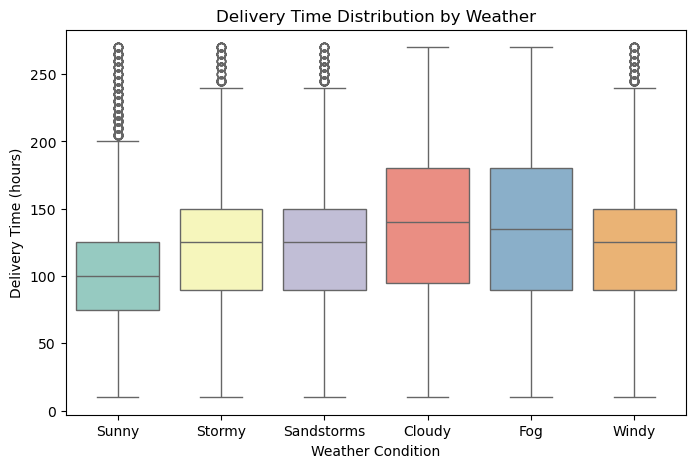

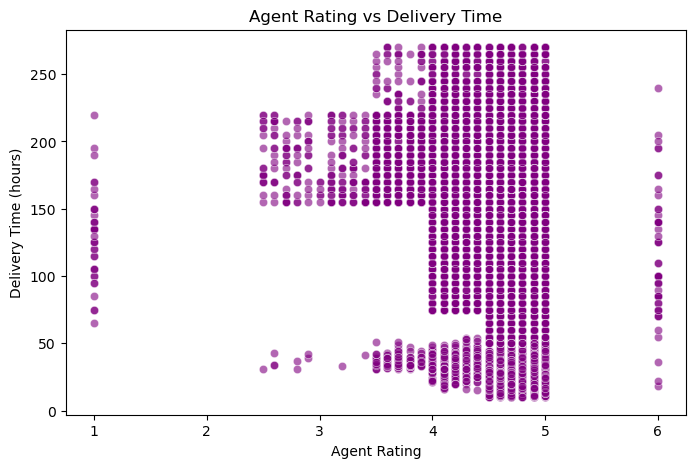

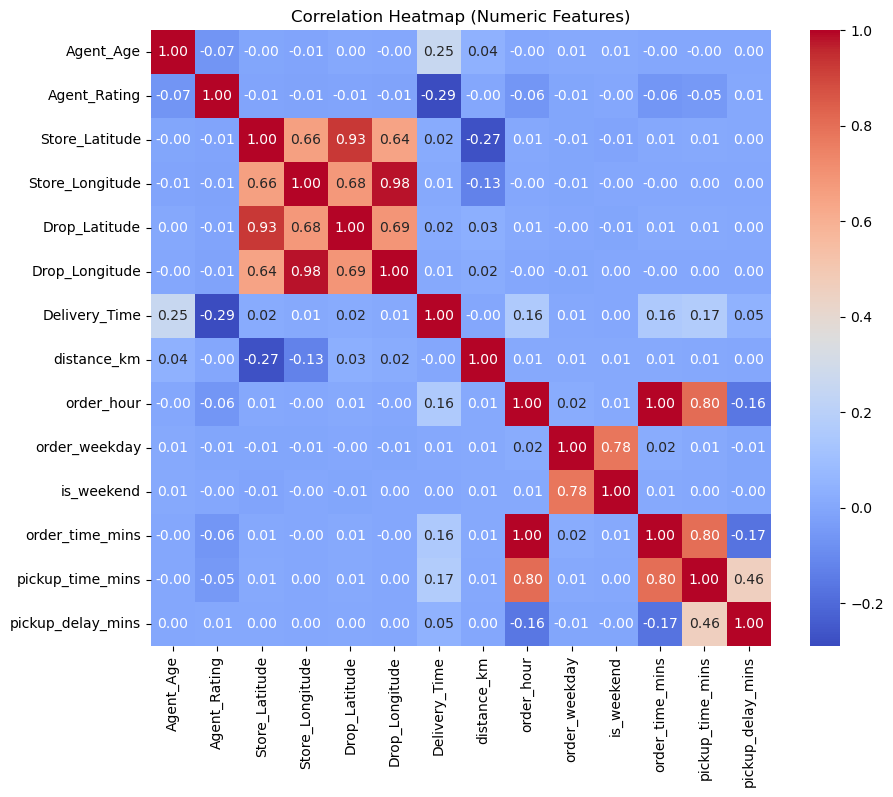

In [10]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df, hue='Traffic', palette="Set2", legend=False)
plt.title("Delivery Time Distribution by Traffic Condition")
plt.xlabel("Traffic Condition")
plt.ylabel("Delivery Time (hours)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Weather', y='Delivery_Time', data=df, hue='Weather', palette="Set3", legend=False)
plt.title("Delivery Time Distribution by Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Delivery Time (hours)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df, alpha=0.6, color="purple")
plt.title("Agent Rating vs Delivery Time")
plt.xlabel("Agent Rating")
plt.ylabel("Delivery Time (hours)")
plt.show()

plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = "Delivery_Time"
features = ['Agent_Age','Agent_Rating','distance_km','order_hour','order_weekday',
            'pickup_delay_mins','Weather','Traffic','Vehicle','Area','Category']

X = df[features].copy()
y = df[target]

numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
    
    print(f"\n{name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")


results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

Train shape: (34991, 36) Test shape: (8748, 36)

Linear Regression
RMSE: 33.17
MAE: 26.11
R²: 0.59

Random Forest
RMSE: 22.67
MAE: 17.35
R²: 0.81

Gradient Boosting
RMSE: 25.00
MAE: 19.61
R²: 0.77

Model Comparison:
                        RMSE        MAE        R2
Linear Regression  33.165214  26.107065  0.587103
Random Forest      22.668412  17.345906  0.807106
Gradient Boosting  25.004658  19.609019  0.765297


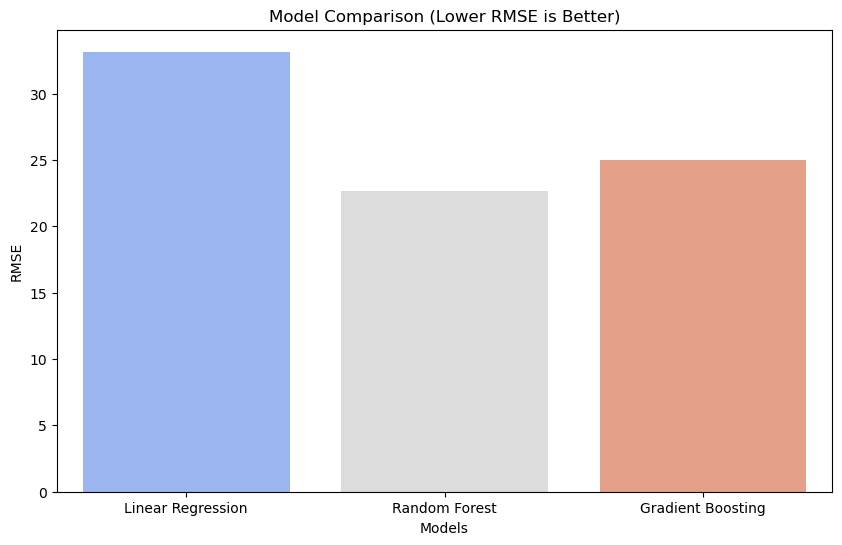

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df["RMSE"], hue=results_df.index, dodge=False, palette="coolwarm", legend=False)
plt.title("Model Comparison (Lower RMSE is Better)")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.show()

In [13]:
import joblib

best_model = models["Random Forest"]
best_model.fit(X_train, y_train)

joblib.dump(best_model, "random_forest_delivery_model.pkl")
print("Best model saved as 'random_forest_delivery_model.pkl'")

Best model saved as 'random_forest_delivery_model.pkl'


In [14]:
model_features = X_train.columns.tolist()
joblib.dump(model_features, "model_features.pkl")
print("Feature columns saved for future predictions")

Feature columns saved for future predictions


In [15]:
best_model = joblib.load("random_forest_delivery_model.pkl")
model_features = joblib.load("model_features.pkl")

import pandas as pd

new_input = pd.DataFrame({
    'Agent_Age': [30],
    'Agent_Rating': [4.5],
    'distance_km': [5.2],
    'order_hour': [14],
    'order_weekday': [2],
    'pickup_delay_mins': [5],
    'Weather_Clear': [1],
    'Weather_Rainy': [0],
})

for col in model_features:
    if col not in new_input.columns:
        new_input[col] = 0
new_input = new_input[model_features]

prediction = best_model.predict(new_input)
print(f"Predicted Delivery Time: {prediction[0]:.2f} hours")

Predicted Delivery Time: 143.90 hours


In [16]:
df_clean = df[(df['Delivery_Time'] > 0) & (df['Delivery_Time'] < 50)]
print("Dataset shape before:", df.shape)
print("Dataset shape after removing outliers:", df_clean.shape)

target = "Delivery_Time"
features = ['Agent_Age','Agent_Rating','distance_km','order_hour','order_weekday','pickup_delay_mins',
            'Weather','Traffic','Vehicle','Area','Category']

X = df_clean[features]
y = df_clean[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20)
best_model.fit(X_train, y_train)

preds = best_model.predict(X_test)

mse = mean_squared_error(y_test, preds)   
rmse = np.sqrt(mse)                       
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nRetrained Random Forest Performance:")
print(f"RMSE: {rmse:.2f} hours")
print(f"MAE: {mae:.2f} hours")
print(f"R²: {r2:.2f}")

joblib.dump(best_model, "random_forest_delivery_model_v2.pkl")
joblib.dump(X_train.columns.tolist(), "model_features_v2.pkl")
print("\n Retrained model saved as 'random_forest_delivery_model_v2.pkl'")
print(" Features saved as 'model_features_v2.pkl'")

sample = X_test.iloc[0:1]
pred = best_model.predict(sample)
print("\nSample Predicted Delivery Time:", round(pred[0], 2), "hours")
print("Actual Delivery Time:", y_test.iloc[0])

Dataset shape before: (43739, 23)
Dataset shape after removing outliers: (2661, 23)

Retrained Random Forest Performance:
RMSE: 4.97 hours
MAE: 4.00 hours
R²: 0.70

 Retrained model saved as 'random_forest_delivery_model_v2.pkl'
 Features saved as 'model_features_v2.pkl'

Sample Predicted Delivery Time: 22.66 hours
Actual Delivery Time: 16


In [17]:
pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [19]:
drop_cols = ["order_id"] if "order_id" in df.columns else []
X = df.drop(columns=["Delivery_Time"] + drop_cols, errors="ignore")
y = df["Delivery_Time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (34991, 22) Test shape: (8748, 22)


In [20]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_imputer, num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", cat_imputer),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

mlflow.set_experiment("Delivery_Time_Prediction")

for name, model in models.items():
    print(f"🔹 Training and logging: {name}")

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    with mlflow.start_run(run_name=name, nested=True):
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        try:
            example = X_test.iloc[:5].copy()
        except:
            example = pd.DataFrame(X_test[:5]).copy()

        if hasattr(model, "get_params"):
            mlflow.log_params(model.get_params())

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        mlflow.sklearn.log_model(
            sk_model=pipe,
            name=name,              
            input_example=example
        )

        print(f"✅ {name} logged successfully → RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")

print("\n All models logged to MLflow successfully! Launch MLflow UI using: mlflow ui")

🔹 Training and logging: Linear Regression


✅ Linear Regression logged successfully → RMSE=36.00, MAE=28.31, R²=0.51
🔹 Training and logging: Random Forest


In [23]:
import joblib, os
joblib.dump(pipe, "best_delivery_model.pkl")

if os.path.exists("best_delivery_model.pkl"):
    print("✅ Model saved successfully!")
else:
    print(" Model not found.")


✅ Model saved successfully!
